In [1]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd

In [2]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

In [3]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' /><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.

In [4]:
soup = BeautifulSoup(response.content, 'lxml')
print(soup.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [ ]:
print(soup)

In [9]:
cards = soup.find_all(lambda tag: tag.name == 'div' and 
                                   tag.get('class') == ['vertical-card_content--title'])
cards

[<div class="vertical-card_content--title">
 <h3>Roy Acuff</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Alabama</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bill Anderson</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Eddy Arnold</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Chet Atkins</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Gene Autry</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>DeFord Bailey</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Bobby Bare</h3>
 </div>,
 <div class="vertical-card_content--title">
 <h3>Johnny Bond</h3>
 </div>]

In [10]:
type(cards)

bs4.element.ResultSet

In [448]:
import re
card_str = str(cards)
cards_list = re.findall(r'\<h3\>(\D+)\</h3\>', card_str)
cards_list

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond']

In [43]:
year = soup.find_all(lambda tag: tag.name == 'div' and 
                                   tag.get('class') == ['vertical-card_content--copy'])
year

[<div class="vertical-card_content--copy">
 <p>
                     Inducted 1962                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2005                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2001                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1966                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1973                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1969                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2005                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 2013                  </p>
 </div>,
 <div class="vertical-card_content--copy">
 <p>
                     Inducted 1999      

In [45]:
year_str = str(year)
year_list = re.findall(r'Inducted\s(\d+)', year_str)
year_list

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']

In [48]:
d = {'Artist Name':cards_list, 'Year Inducted':year_list}
d

{'Artist Name': ['Roy Acuff',
  'Alabama',
  'Bill Anderson',
  'Eddy Arnold',
  'Chet Atkins',
  'Gene Autry',
  'DeFord Bailey',
  'Bobby Bare',
  'Johnny Bond'],
 'Year Inducted': ['1962',
  '2005',
  '2001',
  '1966',
  '1973',
  '1969',
  '2005',
  '2013',
  '1999']}

In [50]:
import pandas as pd
pg_1_df = pd.DataFrame(d)
pg_1_df

,Artist Name,Year Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


In [221]:
t_url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/{}'
artist_name = []
inducted_year = []
for page in range(1,17):
    url = t_url.format(page)
    r = requests.get(url)
    soup = BeautifulSoup(r.content, 'lxml')
    for i in soup.find_all('h3'):
        artist_name.append(i.text)
    for i in soup.find_all(lambda tag: tag.name == 'div' and 
                                   tag.get('class') == ['vertical-card_content--copy']):
        inducted_year.append(i.text.replace('Inducted', '').strip())
       
dt = {'Artist Name': artist_name, 'Year Inducted':inducted_year}
all_artists = pd.DataFrame(dt)

all_artists

,Artist Name,Year Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
135,Hank Williams,1961
136,Bob Wills,1968
137,Mac Wiseman,2014
138,Tammy Wynette,1998


In [93]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [101]:
yr = all_artists['Year Inducted'].value_counts()
yr

2001    12
1966     4
1998     4
2010     4
1967     4
2008     4
2015     4
2012     3
2005     3
1999     3
1996     3
2018     3
2006     3
1980     3
2009     3
2019     3
1997     3
1961     3
1982     3
2011     3
1989     3
2014     3
2007     3
2016     3
2013     3
2017     3
1976     2
1984     2
2002     2
1979     2
1986     2
2004     2
1973     2
1988     2
1974     2
1995     2
1992     2
1970     2
1981     2
2003     2
2000     2
1994     1
1990     1
1965     1
1983     1
1977     1
1968     1
1962     1
1964     1
1972     1
1991     1
1969     1
1975     1
1993     1
1987     1
1978     1
1971     1
1985     1
Name: Year Inducted, dtype: int64

In [123]:
yr_df = pd.DataFrame({'Year':yr.index, 'Inductees':yr.values})
yr_df = yr_df.sort_values(by='Year')
yr_df = yr_df.set_index('Year')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57]),
 [Text(0, 0, '1961'),
  Text(1, 0, '1962'),
  Text(2, 0, '1964'),
  Text(3, 0, '1965'),
  Text(4, 0, '1966'),
  Text(5, 0, '1967'),
  Text(6, 0, '1968'),
  Text(7, 0, '1969'),
  Text(8, 0, '1970'),
  Text(9, 0, '1971'),
  Text(10, 0, '1972'),
  Text(11, 0, '1973'),
  Text(12, 0, '1974'),
  Text(13, 0, '1975'),
  Text(14, 0, '1976'),
  Text(15, 0, '1977'),
  Text(16, 0, '1978'),
  Text(17, 0, '1979'),
  Text(18, 0, '1980'),
  Text(19, 0, '1981'),
  Text(20, 0, '1982'),
  Text(21, 0, '1983'),
  Text(22, 0, '1984'),
  Text(23, 0, '1985'),
  Text(24, 0, '1986'),
  Text(25, 0, '1987'),
  Text(26, 0, '1988'),
  Text(27, 0, '1989'),
  Text(28, 0, '1990'),
  Text(29, 0, '1991'),
  Text(30, 0, '1992'),
  Text(31, 0, '1993'),
  Text(3

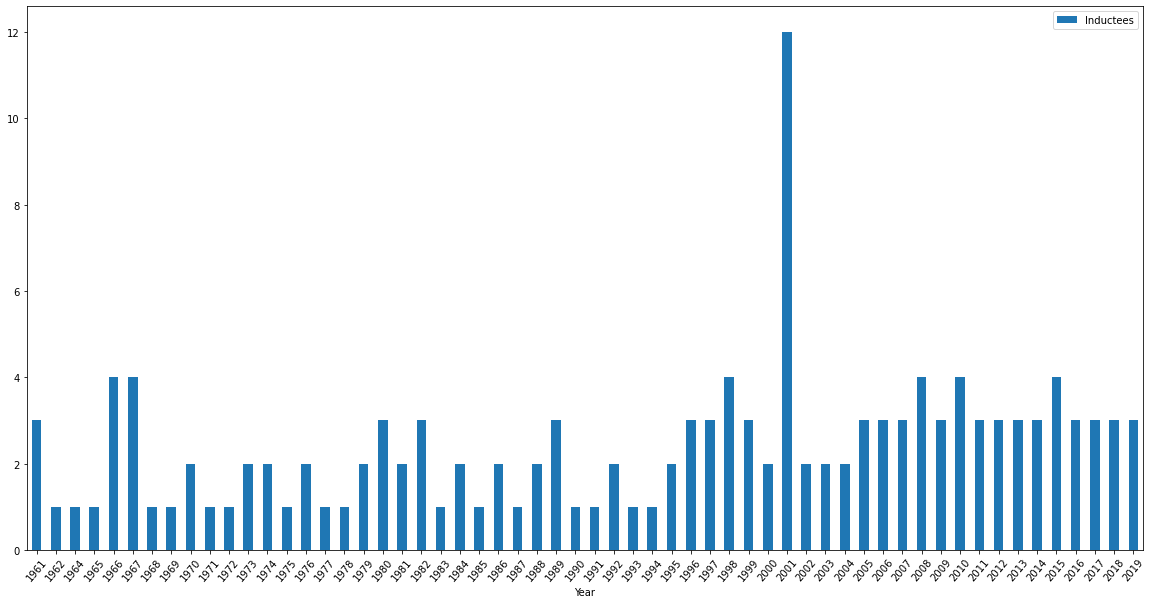

In [140]:
yr_df.plot.bar(figsize=(20,10))
plt.xticks(rotation=50)

Text(43, 11, '10 special inductees')

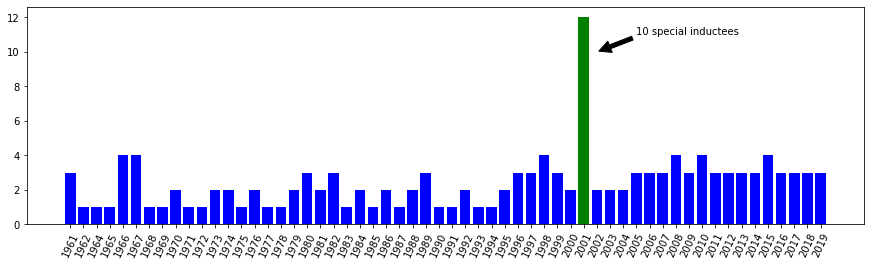

In [181]:
x = yr_df.index
y = yr_df.Inductees
plt.figure(figsize=(15,4))
col = []
for val in y:
    if val < 12:
        col.append('blue')
    else:
        col.append('green')
plt.bar(x, y, color = col)
plt.xticks(rotation=65)
plt.annotate('10 special inductees', xy=(40, 10), xytext=(43, 11),
            arrowprops={'facecolor':'black', 'shrink':0.05})

**Bonus Question:

In [218]:
url_name = []
replacements = [(r'“', ''), (r'”', ''), (r'\u200b', ''), (r' ', '-'), (r'\.', '')]

for element in replacements:
    artist_name = re.sub(element[0], element[1], str(artist_name))
    url_name.append(artist_name)

url_name

["['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond', 'Bobby Braddock', 'Harold Bradley', 'Jerry Bradley', 'Owen Bradley', 'Rod Brasfield', 'Garth Brooks', 'Brooks & Dunn', 'Jim Ed Brown', 'Jim Ed Brown and the Browns', 'Boudleaux and Felice Bryant', 'Glen Campbell', 'Bill Carlisle', 'Carter Family', 'Johnny Cash', 'Roy Clark', 'Cowboy Jack Clement', 'Patsy Cline', 'Hank Cochran', 'Paul Cohen', 'Floyd Cramer', 'Vernon Dalhart', 'Charlie Daniels', 'Jimmie Davis', 'Jimmy Dean', 'Delmore Brothers', 'Jim Denny', 'Little Jimmy Dickens', 'Ralph Emery', 'The Everly Brothers', 'Flatt And Scruggs', 'Jim Foglesong', 'Red Foley', 'Tennessee Ernie Ford', 'Fred Foster', 'Joseph Frank', 'Lefty Frizzell', 'Connie B. Gay', 'Don Gibson', 'Vince Gill', 'Johnny Gimble', 'Merle Haggard', 'Tom T. Hall', 'Emmylou Harris', 'George D. Hay', 'Homer and Jethro', 'Roy Horton', 'Harlan Howard', 'Ferlin Husky', 'Alan Jackson', 'Sonny J

In [230]:
connie = 'https://countrymusichalloffame.org/artist/connie-b-gay/'
r = requests.get(connie)
s = BeautifulSoup(r.content, 'lxml')
s

<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={licenseKey:"NRJS-6b1864f7928149029ec",applicationID:"624285542"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var i=e[n]={exports:{}};t[n][0].call(i.exports,function(e){var i=t[n][1][e];return r(i||e)},

In [246]:
con = []
for i in s.find_all('p', attrs={'style':'margin-top: 20px;color: #50565A;font-size: 14px;font-weight: 500;letter-spacing: 1.5px;line-height: 25px; text-transform: uppercase;'}):
    con.append(i.text)
con

['Birth: August 22, 1914 - Death: December 4, 1989  Birthplace: Lizard Lick, North Carolina ']

In [229]:
url_name = []

for i in artist_name:
    regex = i.replace(' ', '-').replace('\u200b', '').replace('“', '').replace('”', '').replace('.', '')
    url_name.append(regex)

url_name

['Roy-Acuff',
 'Alabama',
 'Bill-Anderson',
 'Eddy-Arnold',
 'Chet-Atkins',
 'Gene-Autry',
 'DeFord-Bailey',
 'Bobby-Bare',
 'Johnny-Bond',
 'Bobby-Braddock',
 'Harold-Bradley',
 'Jerry-Bradley',
 'Owen-Bradley',
 'Rod-Brasfield',
 'Garth-Brooks',
 'Brooks-&-Dunn',
 'Jim-Ed-Brown',
 'Jim-Ed-Brown-and-the-Browns',
 'Boudleaux-and-Felice-Bryant',
 'Glen-Campbell',
 'Bill-Carlisle',
 'Carter-Family',
 'Johnny-Cash',
 'Roy-Clark',
 'Cowboy-Jack-Clement',
 'Patsy-Cline',
 'Hank-Cochran',
 'Paul-Cohen',
 'Floyd-Cramer',
 'Vernon-Dalhart',
 'Charlie-Daniels',
 'Jimmie-Davis',
 'Jimmy-Dean',
 'Delmore-Brothers',
 'Jim-Denny',
 'Little-Jimmy-Dickens',
 'Ralph-Emery',
 'The-Everly-Brothers',
 'Flatt-And-Scruggs',
 'Jim-Foglesong',
 'Red-Foley',
 'Tennessee-Ernie-Ford',
 'Fred-Foster',
 'Joseph-Frank',
 'Lefty-Frizzell',
 'Connie-B-Gay',
 'Don-Gibson',
 'Vince-Gill',
 'Johnny-Gimble',
 'Merle-Haggard',
 'Tom-T-Hall',
 'Emmylou-Harris',
 'George-D-Hay',
 'Homer-and-Jethro',
 'Roy-Horton',
 'Harlan

In [258]:
fix_artist_name = []

for i in artist_name:
    regex = i.replace('\u200b', '')
    fix_artist_name.append(regex)
    
fix_artist_name

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond',
 'Bobby Braddock',
 'Harold Bradley',
 'Jerry Bradley',
 'Owen Bradley',
 'Rod Brasfield',
 'Garth Brooks',
 'Brooks & Dunn',
 'Jim Ed Brown',
 'Jim Ed Brown and the Browns',
 'Boudleaux and Felice Bryant',
 'Glen Campbell',
 'Bill Carlisle',
 'Carter Family',
 'Johnny Cash',
 'Roy Clark',
 'Cowboy Jack Clement',
 'Patsy Cline',
 'Hank Cochran',
 'Paul Cohen',
 'Floyd Cramer',
 'Vernon Dalhart',
 'Charlie Daniels',
 'Jimmie Davis',
 'Jimmy Dean',
 'Delmore Brothers',
 'Jim Denny',
 'Little Jimmy Dickens',
 'Ralph Emery',
 'The Everly Brothers',
 'Flatt And Scruggs',
 'Jim Foglesong',
 'Red Foley',
 'Tennessee Ernie Ford',
 'Fred Foster',
 'Joseph Frank',
 'Lefty Frizzell',
 'Connie B. Gay',
 'Don Gibson',
 'Vince Gill',
 'Johnny Gimble',
 'Merle Haggard',
 'Tom T. Hall',
 'Emmylou Harris',
 'George D. Hay',
 'Homer and Jethro',
 'Roy Horton',
 'Har

In [396]:
info_list = []

In [ ]:
for i in url_name:
    web_base = 'https://countrymusichalloffame.org/artist/' + str(i)
    web_response = requests.get(web_base)
    web_soup = BeautifulSoup(web_response.content, 'lxml')
    v = web_soup.find('p', attrs={'style':'margin-top: 20px;color: #50565A;font-size: 14px;font-weight: 500;letter-spacing: 1.5px;line-height: 25px; text-transform: uppercase;'})
    info_list.append(v.text if v else '')
    

info_list

In [407]:
len(info_list)

140

In [427]:
info_list[0]

'Birth: September 15, 1903 - Death: November 23, 1992  Birthplace: Maynardville, Tennessee '

In [446]:
del re
#HEY! don't name variables the same thing as import modules, dummy!!!!

In [478]:
birth_column = []
death_column = []
birthplace_column = []

for i in info_list:
    
    try:
        regex = re.search(r'Birth:\s(\w+\s\d+,\s\d+)', i)
        birth_column.append(regex.group(1))
    except:
        birth_column.append('NA')
    
    try:
        regex_a = re.search(r'Death:\s(\w+\s\d+,\s\d+)', i)
        death_column.append(regex_a.group(1))
    except:
        death_column.append('Not Dead')
    
    try:
        regex_b = re.search(r'Birthplace:\s(\w+,\s\w+)', i)
        birthplace_column.append(regex_b.group(1))
    except:
        birthplace_column.append('NA')

In [485]:
birth_column[0:5]

['September 15, 1903',
 'NA',
 'November 1, 1937',
 'May 15, 1918',
 'June 20, 1924']

In [486]:
death_column[0:5]

['November 23, 1992', 'Not Dead', 'Not Dead', 'May 8, 2008', 'June 30, 2001']

In [487]:
birthplace_column[0:5]

['Maynardville, Tennessee',
 'NA',
 'Columbia, South',
 'Henderson, Tennessee',
 'Luttrell, Tennessee']

In [482]:
artist_info_df = pd.DataFrame({'Artist':fix_artist_name, 'Year_Inducted':inducted_year, 'Birthplace':birthplace_column, 'Birth':birth_column, 'Death':death_column})
artist_info_df

,Artist,Year_Inducted,Birthplace,Birth,Death
0,Roy Acuff,1962,"Maynardville, Tennessee","September 15, 1903","November 23, 1992"
1,Alabama,2005,NA,NA,Not Dead
2,Bill Anderson,2001,"Columbia, South","November 1, 1937",Not Dead
3,Eddy Arnold,1966,"Henderson, Tennessee","May 15, 1918","May 8, 2008"
4,Chet Atkins,1973,"Luttrell, Tennessee","June 20, 1924","June 30, 2001"
...,...,...,...,...,...
135,Hank Williams,1961,NA,"September 17, 1923","January 1, 1953"
136,Bob Wills,1968,"Kosse, Texas","March 6, 1905","May 13, 1975"
137,Mac Wiseman,2014,"Crimora, Virginia","May 23, 1925","February 24, 2019"
138,Tammy Wynette,1998,NA,"May 5, 1942","April 6, 1998"
